In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt
import timeit
import xarray as xr

In [2]:
workingdir = '/Users/daminton/work/Projects/Swiftest/Elliott_Performance/high_high_1500_1/'

In [3]:
def readswifter(inparfile):
    inparfile = workingdir + inparfile
    param = {}
    param = swio.read_swifter_param(inparfile)
    param['BIN_OUT'] = workingdir + param['BIN_OUT']
    ds = swio.swifter2xr(param)
    ds['Mass'] = ds['Mass'] * config['GU']
    return ds

In [4]:
def readswiftest(config_file_name):
    config_file_name = workingdir + config_file_name
    config = {}
    config = swio.read_swiftest_config(config_file_name)
    config['BIN_OUT'] = workingdir + config['BIN_OUT']
    ds = swio.swiftest2xr(config)
    ds['Mass'] = ds['Mass'] * config['GU']
    ds['radmarker'] = ds['Radius'].fillna(0)
    ds['radmarker'] = ds['radmarker'] / ds['radmarker'].max()
    return ds

In [5]:
disk = readswiftest('param.in')

Reading Swiftest file /Users/daminton/work/Projects/Swiftest/Elliott_Performance/high_high_1500_1/param.in
Reading frames from file /Users/daminton/work/Projects/Swiftest/Elliott_Performance/high_high_1500_1/bin.dat
Time = 0.0
Time = 500.0
Time = 1000.0
Time = 1500.0
Time = 2000.0
Time = 2500.0
Time = 3000.0
Time = 3500.0
Time = 4000.0
Time = 4500.0
Time = 5000.0
Time = 5500.0
Time = 6000.0
Time = 6500.0
Time = 7000.0
Time = 7500.0
Time = 8000.0
Time = 8500.0
Time = 9000.0
Time = 9500.0
Time = 10000.0
Time = 10500.0
Time = 11000.0
Time = 11500.0
Time = 12000.0
Time = 12500.0
Time = 13000.0
Time = 13500.0
Time = 14000.0
Time = 14500.0
Time = 15000.0
Time = 15500.0
Time = 16000.0
Time = 16500.0
Time = 17000.0
Time = 17500.0
Time = 18000.0
Time = 18500.0
Time = 19000.0
Time = 19500.0
Time = 20000.0


In [6]:
disk['radmarker'] = disk['radmarker'] / 1
disk['radmarker'].max()

<xarray.DataArray 'radmarker' ()>
array(1.)
Coordinates:
    ntp      int32 0

In [7]:
disk.sizes['time']

41

In [8]:
disk

<xarray.Dataset>
Dimensions:    (id: 1595, time: 41)
Coordinates:
    ntp        int32 0
  * id         (id) float64 2.0 3.0 4.0 5.0 ... 1.009e+04 1.009e+04 1.01e+04
  * time       (time) float64 0.0 500.0 1e+03 1.5e+03 ... 1.9e+04 1.95e+04 2e+04
    npl        (time) int32 1501 1501 1501 1501 1501 ... 1567 1565 1563 1563
Data variables:
    a          (time, id) float64 9.113e+06 1.067e+07 ... 1.113e+07 1.119e+07
    e          (time, id) float64 0.02115 0.008838 0.009927 ... 0.0227 0.01982
    inc        (time, id) float64 0.00155 0.001431 ... 0.002669 0.002293
    capom      (time, id) float64 6.112 2.23 0.001328 ... 5.865 5.949 5.816
    omega      (time, id) float64 2.144 0.9395 4.552 5.005 ... 1.763 1.562 1.652
    capm       (time, id) float64 6.154 0.6746 3.227 ... 3.826 3.943 3.985
    Mass       (time, id) float64 6.612e-06 2.119e-06 ... 5.007e-06 5.007e-06
    Radius     (time, id) float64 7.076e+03 4.842e+03 ... 4.377e+03 4.377e+03
    radmarker  (time, id) float64 0.541 0.3702 0.8604 ... 0.3346 0.3346 0.3346

In [9]:
disk['a'].isel(id=1563).values

array([             nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan, 9016553.13090581,
       9016401.50991297, 9016149.65351738, 9015785.0788279 ,
       9015304.20639912, 9014713.28750873, 9014031.77210284,
       9013304.3685138 , 9012603.71454923])

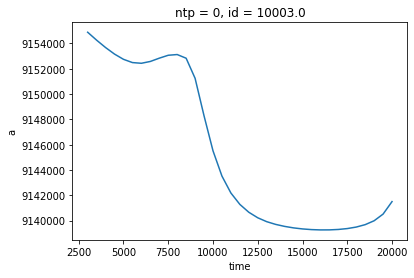

In [10]:
#import seaborn as sns
#sns.lmplot('a', 'e', data=disk, fit_reg=False)
disk['a'].isel(id=1502).plot.line(x='time')

In [11]:
fig = plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
disk.isel(time=0).plot.scatter(x='a', y='e', markersize='radmarker', size_norm)
plt.rcParams.update({'font.size': 18})
ax.set_yscale('log')
plt.ylim((1e-4,1.0))

SyntaxError: positional argument follows keyword argument (<ipython-input-11-415d3b9dc4b3>, line 3)

Reading Swiftest file /Users/daminton/work/Projects/Swiftest/Elliott_Performance/high_high_1500_1/param.in


NameError: name 'FortranFile' is not defined